In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('upi_fraud_dataset.csv', index_col = 0)
dataset = dataset.drop(columns=['category', 'state'])

In [3]:
dataset.head()

,trans_day,trans_month,trans_year,upi_number,age,trans_amount,zip,fraud_risk
trans_hour,,,,,,,,
22,16,9,2021,87,27,199.31,84946,1
12,13,7,2016,71990978,42,448.06,68524,1
13,10,8,2019,5601,70,127.79,34800,1
10,7,10,2023,671623009,61,967.70,7311,0
17,10,1,2022,666,40,911.30,60970,1


In [4]:
import numpy as np

In [5]:
x = dataset.iloc[ : , : 10 ].values
y = dataset.iloc[ :,7 ].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [8]:
x_train.shape

(850, 8)

In [9]:
x_test.shape

(150, 8)

In [10]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [11]:
print('Fraud cases in training data = ', fraud)
print('valid cases in training data = ', valid)

Fraud cases in training data =  420
valid cases in training data =  430


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train[ : 5]

array([[ 0.76217427, -0.71097944, -0.78390142, -0.3693696 , -1.10510419,
         1.52226495, -0.46928424, -0.98830369],
       [-0.88825405, -1.28164283, -0.39673337, -0.370459  , -1.37026681,
        -1.5223325 , -0.84639786,  1.01183473],
       [ 0.2120315 , -0.14031606, -1.17106947, -0.36999802,  0.28699954,
         0.75816644, -0.26526797, -0.98830369],
       [-0.11805417, -0.71097944, -0.39673337, -0.3704576 ,  1.74539392,
         1.51418606, -1.5222322 ,  1.01183473],
       [ 0.65214571, -0.14031606, -0.39673337, -0.05741711, -1.37026681,
        -0.73817975,  0.1483293 , -0.98830369]])

In [15]:
x_test[ : 5]

array([[-0.00802561, -1.56697452,  0.37760272, -0.32520305, -0.57477896,
         0.83752544, -0.05067874,  1.01183473],
       [ 0.87220282,  0.71567902, -0.00956533,  4.64063349,  0.4858715 ,
         1.19317532,  1.33757794,  1.01183473],
       [ 1.09225993,  0.43034733,  0.76477076,  0.77155682,  0.75103411,
        -0.70847374,  0.264284  , -0.98830369],
       [-0.11805417,  0.71567902,  1.15193881,  1.8919959 ,  0.94990607,
         0.42818312, -1.00485305, -0.98830369],
       [ 0.4320886 , -1.28164283, -1.55823751, -0.37040303, -0.83994158,
         0.69560867,  0.53347697, -0.98830369]])

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
LR_model = LogisticRegression(random_state=0)


In [18]:
LR_model.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [19]:
y_pred = LR_model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
acc_lr = accuracy_score(y_test,y_pred)

In [22]:
print(acc_lr)

1.0


In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = KNN_model.predict(x_test)

In [25]:
acc_knn = accuracy_score(y_test, y_pred)

In [26]:
print(acc_knn)

1.0


In [27]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear',random_state = 0)
SVM_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [28]:
y_pred = SVM_model.predict(x_test)

In [29]:
acc_svm = accuracy_score(y_test, y_pred)

In [30]:
print(acc_svm)

1.0


In [31]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = NB_model.predict(x_test)

In [33]:
acc_nb = accuracy_score(y_test, y_pred)

In [34]:
print(acc_nb)

1.0


In [35]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred = DT_model.predict(x_test)

In [37]:
acc_DT = accuracy_score(y_test, y_pred)

In [38]:
print(acc_DT)

1.0


In [39]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = RF_model.predict(x_test)

In [41]:
acc_RF = accuracy_score(y_test, y_pred)

In [42]:
print(acc_RF)

1.0


In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [44]:
CNN_model = tf.keras.models.Sequential()

In [45]:
CNN_model.add(tf.keras.layers.Dense(64, input_dim = 10, activation ='relu'))
CNN_model.add(tf.keras.layers.Dense(128, activation ='relu'))
CNN_model.add(tf.keras.layers.Dense(1, activation ='sigmoid'))

In [46]:
CNN_model = models.Sequential([
    layers.Input(shape=(8,)),])
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
CNN_model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
27/27 [==============================] - 0s 428us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 2/200
27/27 [==============================] - 0s 371us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 3/200
27/27 [==============================] - 0s 375us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 4/200
27/27 [==============================] - 0s 341us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 5/200
27/27 [==============================] - 0s 331us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 6/200
27/27 [==============================] - 0s 339us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 7/200
27/27 [==============================] - 0s 325us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 8/200
27/27 [==============================] - 0s 365us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 9/200
27/27 [==============================] - 0s 332us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 10/200
27/27 [==============================] - 0s 335us/step - loss: 5.2879 - accura

2023-09-05 17:27:49.390332: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


27/27 [==============================] - 0s 442us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 13/200
27/27 [==============================] - 0s 376us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 14/200
27/27 [==============================] - 0s 352us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 15/200
27/27 [==============================] - 0s 358us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 16/200
27/27 [==============================] - 0s 341us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 17/200
27/27 [==============================] - 0s 363us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 18/200
27/27 [==============================] - 0s 363us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 19/200
27/27 [==============================] - 0s 344us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 20/200
27/27 [==============================] - 0s 357us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 21/200
27/27 [==============================] - 0s 345us/step - loss: 5.2879 - accuracy: 

27/27 [==============================] - 0s 326us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 93/200
27/27 [==============================] - 0s 345us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 94/200
27/27 [==============================] - 0s 357us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 95/200
27/27 [==============================] - 0s 309us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 96/200
27/27 [==============================] - 0s 342us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 97/200
27/27 [==============================] - 0s 315us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 98/200
27/27 [==============================] - 0s 335us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 99/200
27/27 [==============================] - 0s 321us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 100/200
27/27 [==============================] - 0s 327us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 101/200
27/27 [==============================] - 0s 326us/step - loss: 5.2879 - accuracy

27/27 [==============================] - 0s 320us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 172/200
27/27 [==============================] - 0s 327us/step - loss: 5.2878 - accuracy: 0.1294
Epoch 173/200
27/27 [==============================] - 0s 334us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 174/200
27/27 [==============================] - 0s 321us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 175/200
27/27 [==============================] - 0s 348us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 176/200
27/27 [==============================] - 0s 333us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 177/200
27/27 [==============================] - 0s 354us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 178/200
27/27 [==============================] - 0s 320us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 179/200
27/27 [==============================] - 0s 339us/step - loss: 5.2879 - accuracy: 0.1294
Epoch 180/200
27/27 [==============================] - 0s 350us/step - loss: 5.2879 - a

In [48]:
 loss, acc_cnn = CNN_model.evaluate(x_train, y_train, verbose = 0)

In [49]:
print(acc_cnn)

0.12941177189350128


In [50]:
y_pred = CNN_model.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

5/5 [==============================] - 0s 385us/step


In [51]:
scores = [acc_lr * 100,
         acc_knn * 100,
         acc_svm * 100,
         acc_nb * 100,
         acc_DT * 100,
         acc_RF * 100,
         acc_cnn * 100]

In [54]:
names = ["Logistic regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "Convolutional Neural Network"]

In [55]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df['Accuracy score (%)'] = scores
df = df.sort_values('Accuracy score (%)', ascending = False)
print(len(names))
print(len(scores))


7
7


In [56]:
df

,Algorithm Name,Accuracy score (%)
0,Logistic regression,100.000000
1,K-Nearest Neighbors,100.000000
2,Support Vector Machine,100.000000
3,Naive Bayes,100.000000
4,Decision Tree,100.000000
5,Random Forest,100.000000
6,Convolutional Neural Network,12.941177


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

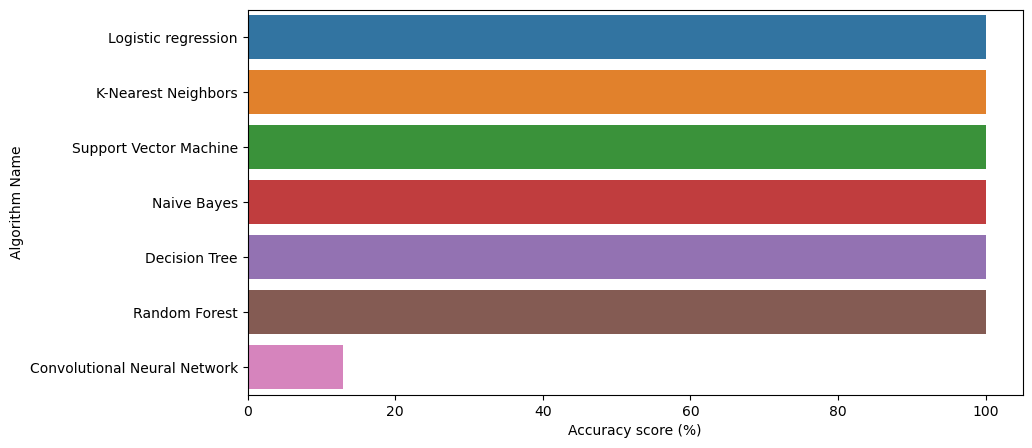

In [58]:
fig = plt.subplots(figsize = (10,5))
ax = sns.barplot(x = "Accuracy score (%)", y = "Algorithm Name", data =df)

In [59]:
import os.path

In [ ]:
if os.path.isfile('') is False:
    CNN_model.save('')